# Chapter2. Machine Learning (1)
Linear regression + Optimization(gradient descent)

Correlation

# Optimization + Linear regression
> Linear regression using optimization(Gradient Descent)  
1) Generate random data of y = 0.1x + 0.3 + N(0, 0.3)   
2) Set y=Wx+b  
3) Find optimal W, b using gradient descent optimization  



In [1]:
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt
import torch

x shape is:  (100, 1)
y shape is:  (100, 1)


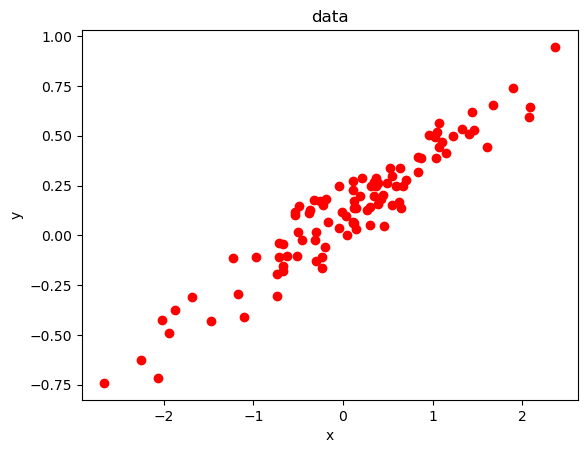

In [2]:
N = 100
theta0 = 0.1
theta1 = 0.3

x = np.random.normal(0.0, 1, N).reshape(-1, 1)
y = theta0 + theta1 * x
y = y + np.random.normal(0.0, 0.1, N).reshape(-1, 1)

print('x shape is: ', x.shape)
print('y shape is: ', y.shape)

plt.figure()
plt.plot(x, y, 'ro')
plt.title('data')
plt.xlabel('x'), plt.ylabel('y')
plt.show()

## Solve using Linear Algebra

In [3]:
A = np.hstack([x**0, x])
A = np.asmatrix(A)
theta = np.array((A.T * A).I * A.T * y)

print(A.shape)
print(theta)

(100, 2)
[[0.10408481]
 [0.30250156]]


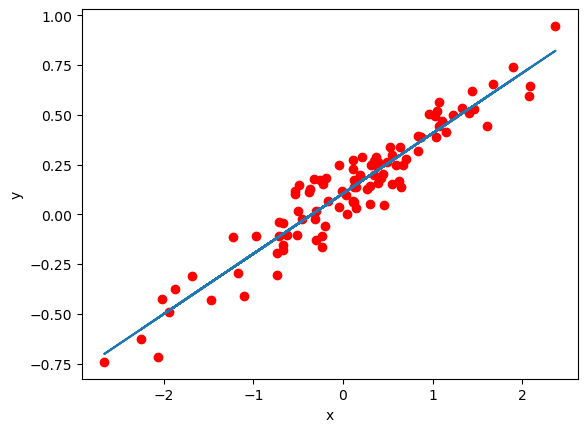

In [4]:
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, theta[1,0]*x + theta[0,0])
plt.xlabel('x'), plt.ylabel('y')
plt.show()

## Solve using Gradient Descent with Linear Algebra

In [ ]:
import numpy as np

# Initialize theta
theta = np.random.randn(2, 1)
theta = np.asmatrix(theta)

# Learning rate
alpha = 0.00001
n_iter = 3000
theta_history = []

# Gradient descent
for _ in range(n_iter):
    df = 2 * (A.T * A * theta - A.T * y)
    theta = theta - alpha * df
    theta_history.append(np.array(theta)[:,0])

print(theta)

[[0.10379195]
 [0.30464414]]


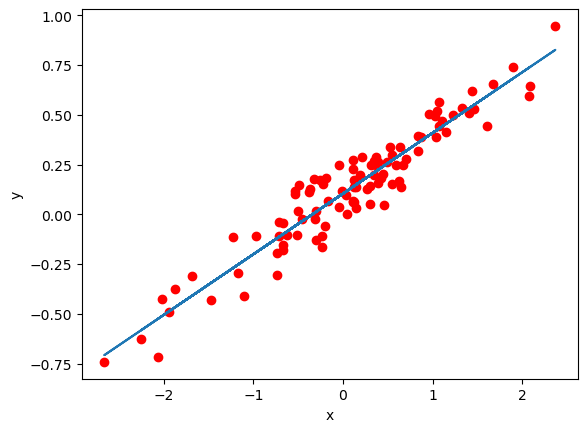

In [6]:
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, theta[1,0]*x + theta[0,0])
plt.xlabel('x'), plt.ylabel('y')
plt.show()

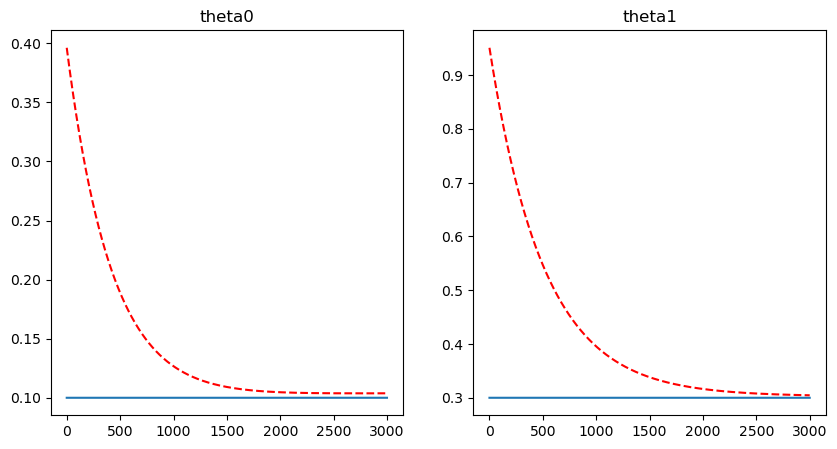

In [7]:
theta_history = np.array(theta_history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta0)
plt.plot(theta_history[:,0], 'r--')
plt.title('theta0')
plt.subplot(1,2,2)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta1)
plt.plot(theta_history[:,1], 'r--')
plt.title('theta1')
plt.show()

## Solve using Gradient Descent with Pytorch

### Let's solve our problem!

In [34]:
theta = np.array(([1], [1]))
theta = np.asmatrix(theta)
A = np.hstack([x**0, x])
A = np.asmatrix(A)
df = 2 * (A.T * A * theta - A.T * y)
print(df)

x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).float()
theta = torch.tensor(np.array((1,1)), dtype=float, requires_grad=True)
loss = ((y_tensor - (theta[1]*x_tensor + theta[0]))**2).sum()
loss.backward()
print('grad: ', theta.grad)

[[192.20270063]
 [147.54550489]]
grad:  tensor([192.2027, 147.5455], dtype=torch.float64)


In [8]:
# parameters to optimize
# Initial value is randomly set
# requires_grad=True: take into account in the gradient

def find_theta(x_tensor, y_tensor, n_iter, step_size):
    t0 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
    t1 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
    optimizer = torch.optim.SGD([t1, t0], lr=step_size)

    # Gradient Descent
    theta_history = []
    for t in range(0, n_iter):        
        # Calculate gradient
        
        loss = ((y_tensor - (t1*x_tensor + t0))**2).sum()
        loss.backward()

        # This is how the optimizer actually works (theta0 and 1 are updated)
        optimizer.step()
        optimizer.zero_grad()
        
        # Save Log
        theta_history.append([t0.item(), t1.item()])
        if (t%10==0):
            print('iter= {},\t theta0: {:3f},\t theta1: {:3f}, \t loss: {:3f}'\
                .format(t,t0.item(), t1.item(), loss.item()))
    theta_history = np.array(theta_history)
    
    return theta_history, t0, t1

In [ ]:
n_iter = 100
step_size = 0.001

theta_history, t0, t1 = find_theta(x_tensor, y_tensor, n_iter, step_size)


iter= 0,	 theta0: -0.112217,	 theta1: -1.245545, 	 loss: 365.151013
iter= 10,	 theta0: 0.122146,	 theta1: 0.109963, 	 loss: 6.113204
iter= 20,	 theta0: 0.111283,	 theta1: 0.277338, 	 loss: 1.000845
iter= 30,	 theta0: 0.105558,	 theta1: 0.299082, 	 loss: 0.911684
iter= 40,	 theta0: 0.104340,	 theta1: 0.302023, 	 loss: 0.909924
iter= 50,	 theta0: 0.104126,	 theta1: 0.302433, 	 loss: 0.909887
iter= 60,	 theta0: 0.104091,	 theta1: 0.302492, 	 loss: 0.909886
iter= 70,	 theta0: 0.104086,	 theta1: 0.302500, 	 loss: 0.909886
iter= 80,	 theta0: 0.104085,	 theta1: 0.302501, 	 loss: 0.909886
iter= 90,	 theta0: 0.104085,	 theta1: 0.302502, 	 loss: 0.909886


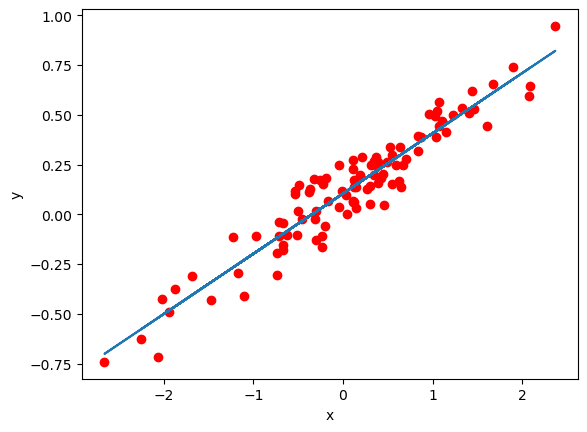

In [10]:
# check data and model
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, (t1.detach().numpy()*x + t0.detach().numpy()))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

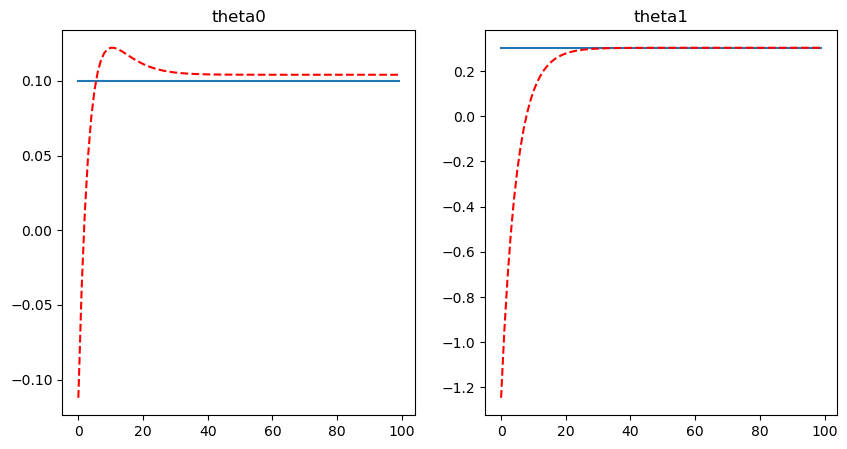

In [11]:
theta_history = np.array(theta_history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta0)
plt.plot(theta_history[:,0], 'r--')
plt.title('theta0')
plt.subplot(1,2,2)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta1)
plt.plot(theta_history[:,1], 'r--')
plt.title('theta1')
plt.show()

## Let's compare the results with the linear algebra

In [12]:
# parameters to optimize
# Initial value is randomly set
# requires_grad=True: take into account in the gradient

t0 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
t1 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)

# theta_math = np.asmatrix(np.concatenate([t0.detach().numpy(), t1.detach().numpy()]))

step_size = 0.001
optimizer = torch.optim.SGD([t1, t0], lr=step_size)

# Gradient Descent
n_iter = 100
theta_history = []
for t in range(0, n_iter):
    # Calculate loss
    loss = ((y_tensor - (t1*x_tensor + t0))**2).sum()
    
    # Calculate gradient
    loss.backward()
    
    ##################################################################
    # Investigate the manual gradient descent step
    # Code within this block (###) is just for the investigation, not required for the optimizer
    # Gradient using torch
    theta0_grad = t0.grad
    theta1_grad = t1.grad
    t0_manual1 = t0.item() - step_size * theta0_grad
    t1_manual1 = t1.item() - step_size * theta1_grad
    
    # Gradient using math
    theta_math = np.asmatrix(np.concatenate([t0.detach().numpy(), t1.detach().numpy()])).T
    df = 2 * (A.T * A * theta_math - A.T * y)
    theta_math = theta_math - step_size * df
    t0_manual2 = theta_math[0,0]
    t1_manual2 = theta_math[1,0]
    ##################################################################
    
    # This is how the optimizer actually works (theta0 and 1 are updated)
    optimizer.step()
    optimizer.zero_grad()
    
    # Save Log
    theta_history.append([t0.item(), t1.item()])
    if (t%10==0):
        print('iter= {},\t t0 (manual 1, 2, optim): {:3f}, {:3f}, {:3f},\t t0 (manual 1, 2, optim): {:3f}, {:3f}, {:3f},'\
              .format(t,t0.item(), t0_manual1.item(),t0_manual2, t1.item(), t1_manual1.item(),t1_manual2))
theta_history = np.array(theta_history)
opt = loss.item()

iter= 0,	 t0 (manual 1, 2, optim): 0.871616, 0.871616, 0.871616,	 t0 (manual 1, 2, optim): -1.164707, -1.164707, -1.164707,
iter= 10,	 t0 (manual 1, 2, optim): 0.228303, 0.228303, 0.228303,	 t0 (manual 1, 2, optim): 0.093706, 0.093706, 0.093706,
iter= 20,	 t0 (manual 1, 2, optim): 0.123413, 0.123413, 0.123413,	 t0 (manual 1, 2, optim): 0.272383, 0.272383, 0.272383,
iter= 30,	 t0 (manual 1, 2, optim): 0.107028, 0.107028, 0.107028,	 t0 (manual 1, 2, optim): 0.298119, 0.298119, 0.298119,
iter= 40,	 t0 (manual 1, 2, optim): 0.104528, 0.104528, 0.104528,	 t0 (manual 1, 2, optim): 0.301860, 0.301860, 0.301860,
iter= 50,	 t0 (manual 1, 2, optim): 0.104151, 0.104151, 0.104151,	 t0 (manual 1, 2, optim): 0.302407, 0.302407, 0.302407,
iter= 60,	 t0 (manual 1, 2, optim): 0.104095, 0.104095, 0.104095,	 t0 (manual 1, 2, optim): 0.302488, 0.302488, 0.302488,
iter= 70,	 t0 (manual 1, 2, optim): 0.104086, 0.104086, 0.104086,	 t0 (manual 1, 2, optim): 0.302500, 0.302500, 0.302500,
iter= 80,	 t0 (manual 

## Solve using Scikit-Learn

[[0.30250156]]
[0.10408481]


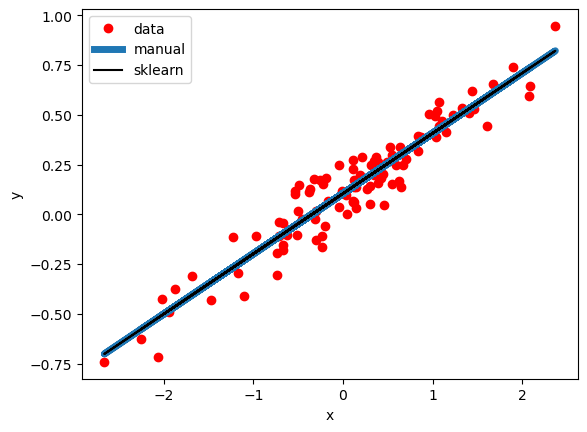

In [13]:
from sklearn import linear_model # type: ignore
reg = linear_model.LinearRegression()
reg.fit(x, y)
print(reg.coef_)
print(reg.intercept_)

plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, reg.coef_*x + reg.intercept_, linewidth=5)
plt.plot(x, reg.predict(x), 'k')
plt.xlabel('x'), plt.ylabel('y')
plt.legend(['data', 'manual', 'sklearn'])
plt.show()

# Linear Regression with Outliers

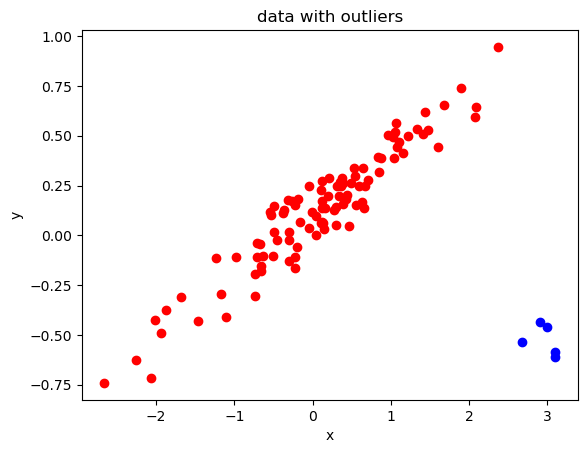

In [14]:
x_out = np.random.normal(3, 0.1, 5)
y_out = np.random.normal(-0.5, 0.1, 5)

x_outlier = np.vstack([x, x_out.reshape(-1,1)])
y_outlier = np.vstack([y, y_out.reshape(-1,1)])

# x_outlier = np.vstack([x, np.array([1, 2]).reshape(-1,1)])
# y_outlier = np.vstack([y, np.array([-0.8, -0.8]).reshape(-1,1)])
A_outlier = np.hstack([x_outlier**0, x_outlier])
A_outlier = np.asmatrix(A_outlier)

plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x_out, y_out, 'bo')
plt.title('data with outliers')
plt.xlabel('x'), plt.ylabel('y')
plt.show()

### L2 Norm

In [15]:
n_iter = 100
step_size = 0.001

x_outlier_tensor = torch.tensor(x_outlier).float()
y_outlier_tensor = torch.tensor(y_outlier).float()

def func_loss(t0, t1):
    loss = ((y_outlier_tensor - (t1*x_outlier_tensor + t0))**2).sum()
    return loss

theta_history, t0, t1 = find_theta(func_loss, n_iter, step_size)


TypeError: find_theta() missing 1 required positional argument: 'step_size'

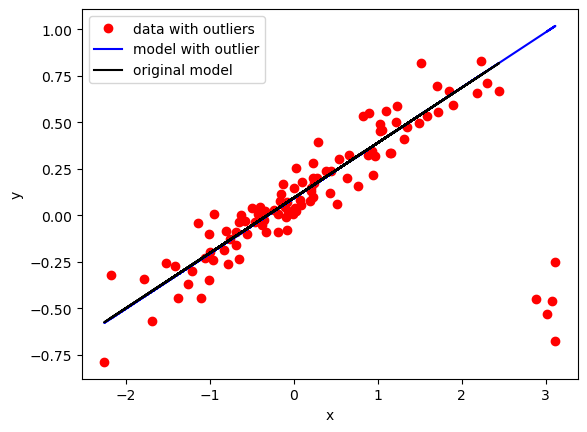

In [ ]:
plt.figure()
plt.plot(x_outlier, y_outlier, 'ro')
plt.plot(x_outlier, (t1.detach().numpy()*x_outlier + t0.detach().numpy()),'b')
plt.plot(x, theta[1,0]*x + theta[0,0],'k')
plt.xlabel('x'), plt.ylabel('y')
plt.legend(['data with outliers', 'model with outlier', 'original model'])
plt.show()

### L1 Norm

In [ ]:
n_iter = 100
step_size = 0.001

x_outlier_tensor = torch.tensor(x_outlier).float()
y_outlier_tensor = torch.tensor(y_outlier).float()

def func_loss(t0, t1):
    loss = abs((y_outlier_tensor - (t1*x_outlier_tensor + t0))).sum()
    return loss

theta_history, t0, t1 = find_theta(func_loss, n_iter, step_size)


iter= 0,	 theta0: -0.070878,	 theta1: 0.042466, 	 loss: 17.672302
iter= 10,	 theta0: 0.080243,	 theta1: 0.274954, 	 loss: 1.111021
iter= 20,	 theta0: 0.091276,	 theta1: 0.294855, 	 loss: 0.999894
iter= 30,	 theta0: 0.092011,	 theta1: 0.296603, 	 loss: 0.999128
iter= 40,	 theta0: 0.092050,	 theta1: 0.296763, 	 loss: 0.999123
iter= 50,	 theta0: 0.092050,	 theta1: 0.296778, 	 loss: 0.999123
iter= 60,	 theta0: 0.092050,	 theta1: 0.296780, 	 loss: 0.999123
iter= 70,	 theta0: 0.092050,	 theta1: 0.296780, 	 loss: 0.999123
iter= 80,	 theta0: 0.092050,	 theta1: 0.296780, 	 loss: 0.999123
iter= 90,	 theta0: 0.092050,	 theta1: 0.296780, 	 loss: 0.999123


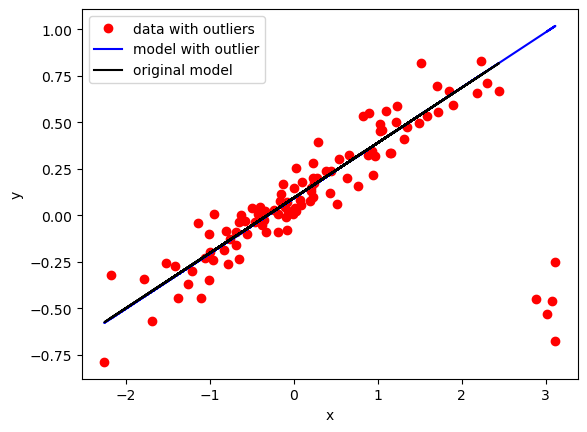

In [ ]:
plt.figure()
plt.plot(x_outlier, y_outlier, 'ro')
plt.plot(x_outlier, (t1.detach().numpy()*x_outlier + t0.detach().numpy()),'b')
plt.plot(x, theta[1,0]*x + theta[0,0],'k')
plt.xlabel('x'), plt.ylabel('y')
plt.legend(['data with outliers', 'model with outlier', 'original model'])
plt.show()

# Linear Classification

# Data Load

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print(np.shape(iris.data))
print('Class labels:', np.unique(y))


(150, 4)
Class labels: [0 1 2]


## Function for drawing data

In [ ]:
from matplotlib.colors import ListedColormap

def draw_scatter(X, y, test_idx=None):
    plt.figure()
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
        
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

## Function for drawing decision boundary

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier=None, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    draw_scatter(X, y, test_idx=None)

    # plot the decision surface
    if classifier:
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))

        lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        lab = lab.reshape(xx1.shape)
        plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())


## Train & Test Dataset Split

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


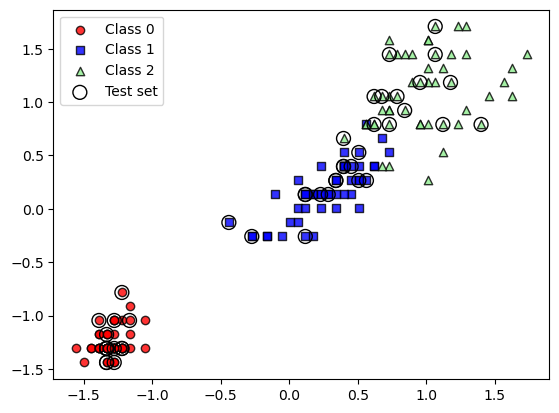

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

draw_scatter(X_combined_std, y_combined, test_idx=range(106, 150))
plt.legend(loc='upper left')

## Subset for Binary Classification

Labels counts in y (subset): [50 50]
Labels counts in y_train (subset): [35 35]
Labels counts in y_test (subset): [15 15]


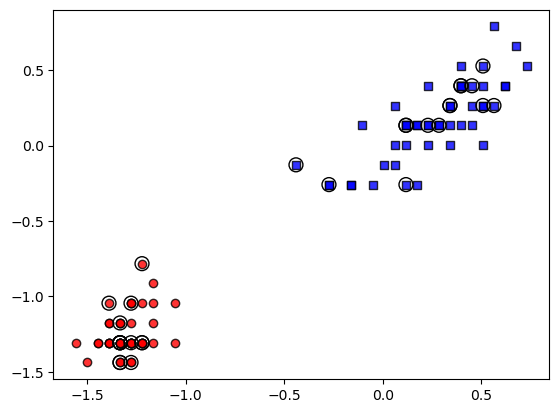

In [ ]:
X_train_01 = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01 = y_train[(y_train == 0) | (y_train == 1)]

X_test_01 = X_test_std[(y_test == 0) | (y_test == 1)]
y_test_01 = y_test[(y_test == 0) | (y_test == 1)]

X_combined_01_std = np.vstack((X_train_01, X_test_01))
y_combined_01 = np.hstack((y_train_01, y_test_01))

print('Labels counts in y (subset):', np.bincount(y_combined_01))
print('Labels counts in y_train (subset):', np.bincount(y_train_01))
print('Labels counts in y_test (subset):', np.bincount(y_test_01))

draw_scatter(X_combined_01_std, y_combined_01, test_idx=range(71, 100))

# Perceptron using Gradient Decent

In [ ]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

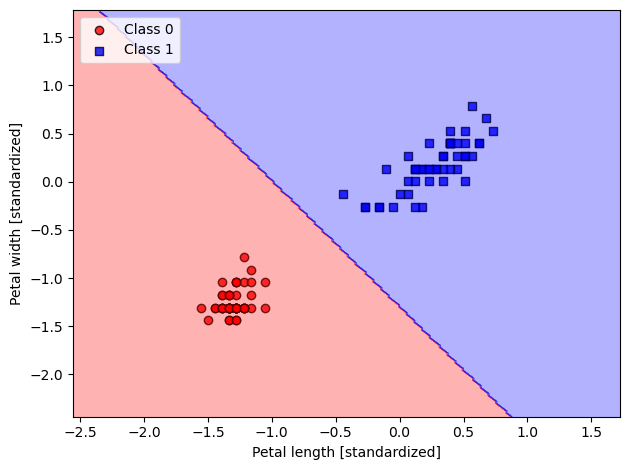

In [ ]:
perc_gd = Perceptron(eta=0.3, n_iter=1000, random_state=1)
perc_gd.fit(X_train_01, y_train_01)

plot_decision_regions(X_combined_01_std, y_combined_01,
                      classifier=perc_gd, test_idx=range(np.shape(X_train_01)[0]+1, np.shape(X_combined_01_std)[0]))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Logistic Regression

In [ ]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

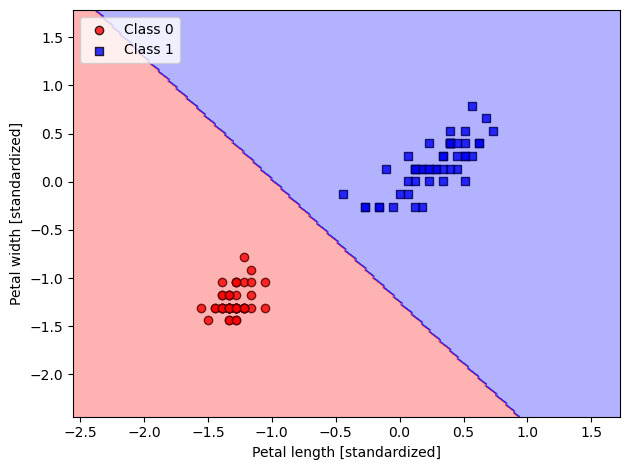

In [ ]:
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01, y_train_01)

plot_decision_regions(X_combined_01_std, y_combined_01,
                      classifier=lrgd, test_idx=range(np.shape(X_train_01)[0]+1, np.shape(X_combined_01_std)[0]))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_05.png', dpi=300)
plt.show()

# Perceptron and Logistic Regression using Scikit-Learn

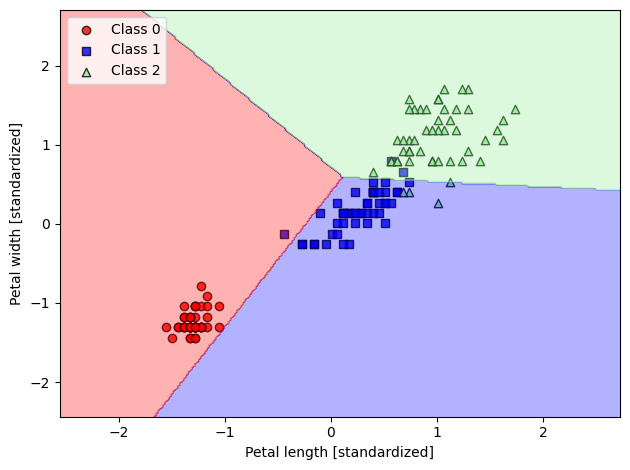

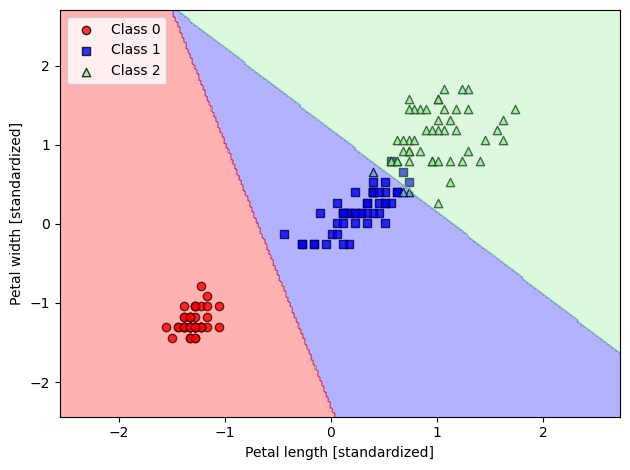

In [ ]:
from sklearn.linear_model import LogisticRegression, Perceptron

perc = Perceptron(eta0=0.1, random_state=1)
perc.fit(X_train_std, y_train)

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=perc, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()